## Cargamos el script proporcionado. 

In [1]:
import numpy as np
%matplotlib inline  

from numpy import *
from numpy.linalg import norm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.pyplot import *
from numpy import *

def gradiente_descendente(grad, x0, step_length = (1/3), tol = 1e-6, max_iter = 200, return_history = False):
  # Convertir el punto de inicio en un arreglo de numpy.
  x = np.array(x0, dtype = float)
  if return_history:
    # Crear arreglo donde se almacenará el histórico de las iteraciones
    x_t = x[None, :].copy()
  # Calcular el gradiente y asegurarse que es un arreglo.
  grad_x = np.array(grad(x))
  iter_ = 0
  # Verificar si se cumple el criterio de parada.
  stop = (np.dot(grad_x, grad_x) < tol) or (iter_ > max_iter)
  # Proceso iterativo.
  while not stop:
    # Incrementar el contador de iteraciones.
    iter_ += 1
    # Actualizar la posición del vector x
    x -= (step_length * grad_x)
    if return_history:
      # Guardar el nuevo punto en el histórico de las iteraciones
      x_t = np.append(x_t, x[None, :], axis = 0)
    # Calcular el gradiente en la nueva posición.
    grad_x = np.array(grad(x))
    # Verificar la condición de paro.
    stop = (np.dot(grad_x, grad_x) < tol) or (iter_ > max_iter)
  # Regresar la solución óptima.
  return x if not return_history else (x, x_t)



## Vamos a graficar la función en sí misma,  en un gráfico interactivo 

In [3]:


%matplotlib inline  

from numpy import *
from numpy.linalg import norm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.pyplot import *
from numpy import *
import plotly.graph_objects as go
import pandas as pd
import numpy as np


x = arange(-5, 5, 1)
y = arange(-5, 5, 1)
X, Y = meshgrid(x, y)

## Aquí hay que meter la función por primera vez
z =  ((3/2)*(X**2)) + (Y**2) - (X*Y) - ((19/4)*(X)) + (2*Y)


z_data = z
sh_0, sh_1 = z.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Gráfica interactiva en 3D', autosize=False,
                  width=600, height=600,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

## Gráfico de contorno

Text(0.5, 1.0, 'Gráfico de contorno')

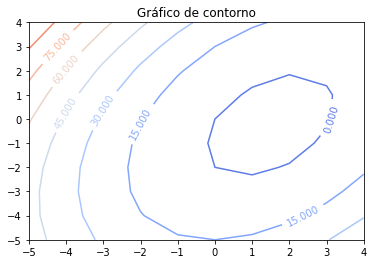

In [4]:
x = arange(-5, 5, 1)
y = arange(-5, 5, 1)
X, Y = meshgrid(x, y)


## Aquí hay que meter la función por segunda vez
Z = ((3/2)*(X**2)) + (Y**2) - (X*Y) - ((19/4)*(X)) + (2*Y)

figure(10)
CS = contour(X, Y, Z, cmap=cm.coolwarm)
clabel(CS, inline=1, fontsize=10)
title('Gráfico de contorno')

## Vamos a calcular el vector gradiente

In [5]:
from sympy import *
x = Symbol('x')
y = Symbol('y')


## Aquí hay que meter la función por tercera vez, pero con minúsculas


## derivada parcial con respecto de X

f =  ((3/2)*(x**2)) + (y**2) - (x*y) - ((19/4)*(x)) + (2*y)


fpx = f.diff(x)
print(fpx)

## derivada parcial con respecto de Y

fpy = f.diff(y)

print(fpy)

# función del gradiente:

grad = [fpx, fpy]
print(grad)

3.0*x - y - 4.75
-x + 2*y + 2
[3.0*x - y - 4.75, -x + 2*y + 2]


## Vamos a optimizar y encontrar el mínimo.

In [6]:
theta = -1 #x
theta1 = 1 #y
alpha = 1/3
iterations = 0
check = 0
precision = 0.01
printData = True
maxIterations = 200

while True:
    temptheta = theta - alpha*N(fpx.subs(x,theta).subs(y,theta1)).evalf()
    temptheta1 = theta1 - alpha*N(fpy.subs(y,theta1)).subs(x,theta).evalf()
    
    iterations += 1
    if iterations > maxIterations:
        print("Too many iterations. Adjust alpha and make sure that the function is convex!")
        printData = False
        break
    if abs(temptheta-theta) < precision and abs(temptheta1-theta1) < precision:
        break
    theta = temptheta
    theta1 = temptheta1
    
if printData:
    print("The function "+str(f)+" converges to a minimum")
    print("Number of iterations:",iterations,sep=" ")
    print("theta (x0) =",temptheta,sep=" ")
    print("theta1 (y0) =",temptheta1,sep=" ")


The function 1.5*x**2 - x*y - 4.75*x + y**2 + 2*y converges to a minimum
Number of iterations: 6
theta (x0) = 1.49657064471879
theta1 (y0) = -0.255144032921811


## Vamos a volver a optimizar con el script del CIMAT para comparar resultado

In [7]:
# Definiendo el vector gradiente


## Meter las derivadas parciales del vector gradiente---------------------------------------

def grad_ex_1(t):
    x = t[0]
    y = t[1]
    return [3.0*x - y - 4.75,   -x + 2*y + 2]

# Usando el método del descenso empinado o gradiente descendente.
x_opt_gd, x_his_gd = gradiente_descendente(grad_ex_1, [-1, 1], return_history = True)
print('La solución óptima encontrada por el gradiente descendente está dada por x1: %4.4f y x2: %4.4f'%tuple(x_opt_gd))


La solución óptima encontrada por el gradiente descendente está dada por x1: 1.4997 y x2: -0.2504


## Vamos a graficar el camino seguido en el gráfico de contorno 

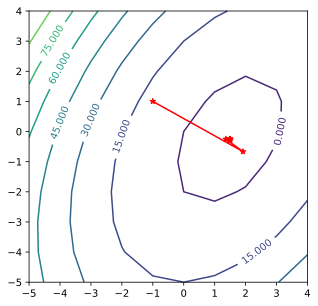

In [8]:

import matplotlib.pyplot as plt
from matplotlib import rcParams
#from matplotlib.pyplot import contour
# Definiendo la función objetivo
def obj_ex_1(t):
    x = t[0]
    y = t[1]
    return ((3/2)*(x**2)) + (y**2) - (x*y) - ((19/4)*(x)) + (2*y)
    
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

import matplotlib.pyplot as plt
from matplotlib import rcParams


# Initialize plot objects
rcParams['figure.figsize'] = 5, 5 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

# Generate a contour plot
cp = ax.contour(X, Y, Z)
clabel(cp, inline=1, fontsize=10)
ax.plot(x_his_gd[:, 0], x_his_gd[:, 1], 'r-*')

## Generaremos la tabla solicitada con los valores de las iteraciones. 

In [9]:
xtmasuno = gradiente_descendente(grad_ex_1, [1, -1], return_history = True)
principio = xtmasuno[1]
principio
xtmasi_final = pd.DataFrame(principio[1:40,])
freim = pd.DataFrame(principio)
def funcion(X):
    for i, j in X.itertuples(index=False):
        x = X[0]
        y = X[1] ## Hay que meter aquí el vector, pero con signos inversos
        return [-(3.0*x - y - 4.75),   -(-x + 2*y + 2)]
gato = funcion(freim)
gato2 = pd.DataFrame(gato)
gato2 = gato2.transpose()
df_all_rows = pd.concat([freim,  gato2, xtmasi_final], axis = 1)
df_all_rows =  df_all_rows.round(4)
df_all_rows= df_all_rows.set_axis(['V', 'W', 'X', 'Y', 'Z', "YI"], axis=1, inplace=False)
df_all_rows['V'] = df_all_rows['V'].astype(str)
df_all_rows['W'] = df_all_rows['W'].astype(str)
df_all_rows['X'] = df_all_rows['X'].astype(str)
df_all_rows['Y'] = df_all_rows['Y'].astype(str)
df_all_rows['Z'] = df_all_rows['Z'].astype(str)
df_all_rows["YI"] = df_all_rows["YI"].astype(str)
df_all_rows['x(t)'] = df_all_rows['V'] + ',' + df_all_rows['W']
df_all_rows['d(t)'] = df_all_rows["X"] + ',' + df_all_rows['Y']
df_all_rows['x(t+1)'] = df_all_rows['Z'] + ',' + df_all_rows['YI']
df_all_rows = df_all_rows.drop(["Y", "X", "V", "W", "Z", "YI"], axis = 1)
df_all_rows.index.names = ['Iteración (t)']
df_all_rows.head(11)

,x(t),d(t),x(t+1)
Iteración (t),,,
0,"1.0,-1.0","0.75,1.0","1.25,-0.6667"
1,"1.25,-0.6667","0.3333,0.5833","1.3611,-0.4722"
2,"1.3611,-0.4722","0.1944,0.3056","1.4259,-0.3704"
3,"1.4259,-0.3704","0.1019,0.1667","1.4599,-0.3148"
4,"1.4599,-0.3148","0.0556,0.0895","1.4784,-0.285"
5,"1.4784,-0.285","0.0298,0.0484","1.4883,-0.2689"
6,"1.4883,-0.2689","0.0161,0.0261","1.4937,-0.2602"
7,"1.4937,-0.2602","0.0087,0.0141","1.4966,-0.2555"
8,"1.4966,-0.2555","0.0047,0.0076","1.4982,-0.253"
